# Train - Test Split

In [2]:
# Author: Arnova Abdullah
# Date: 05-05-2022
# Description: Code for creating stratified train-test split of the music genre dataset

# Edits:
#(14-05-2022)

## Importing modules

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data 

In [118]:
df = pd.read_csv('data/genre_data_final.csv')
df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.507,0.7100,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,4,acoustic
1,0.496,0.3780,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,3,acoustic
2,0.760,0.7650,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,4,acoustic
3,0.607,0.1960,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,4,acoustic
4,0.497,0.0919,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,4,acoustic


From the correlation matrix, four features are selected according to their correlation. 
These four features are:
1. **Energy**
2. **Loudness**
3. **Acousticness**
4. **Instrumentalness**

## Stratified train-test splitting according to the feature 'energy'

### Histogram plotting of 'energy' feature

<AxesSubplot:>

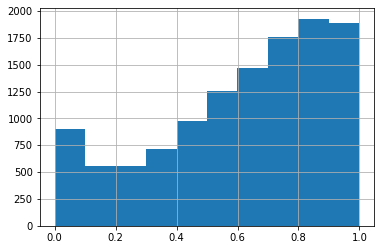

In [119]:
# Plotting histogram of 'energy' column of dataset df
df['energy'].hist()

Most 'energy' values are in 0 and between 0.3 to 1

### Box plot of energy

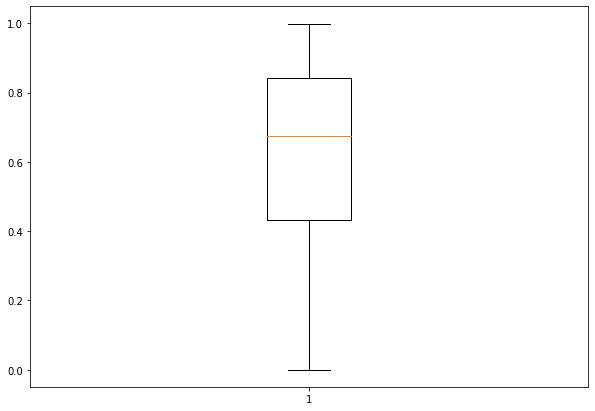

In [120]:
# Plotting the box plot of 'energy' column of dataset df

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['energy'])
plt.show()

### Energy category generation according to histogram

In [121]:
# From histogram, energy is clustered between 0.2 to 1
# Creating energy category attributes with 5 category

df["energy_cat"] = pd.cut(
    df["energy"],
    bins=[0, 0.2, 0.4, 0.6, 0.8, np.inf],
    labels=[1, 2, 3, 4, 5]
)

<AxesSubplot:>

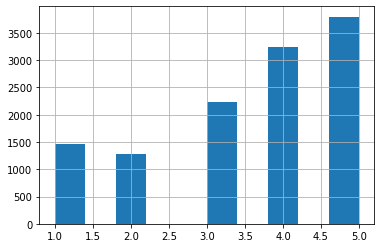

In [122]:
# Plotting histogram of energy category attribute
df["energy_cat"].hist()

### Stratified train test splitting creation according to energy_cat attribute

In [123]:
split_energy_cat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index, test_index in split.split(df, df["energy_cat"]):
    strat_energy_cat_train = df.loc[train_index]
    strat_energy_cat_test = df.loc[test_index]

### Statistical analysis for stratified train test split

In [124]:
def strat_plot(x, y, tx, ty):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].hist(x);
    ax[1].hist(y);
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title(tx);
    ax[1].set_title(ty);

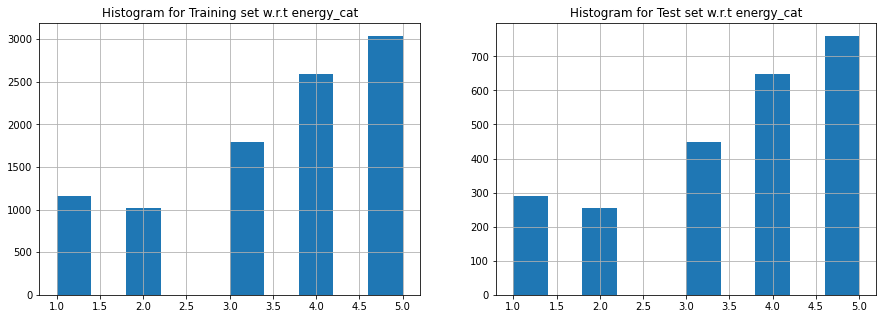

In [125]:
strat_plot(
    strat_energy_cat_train['energy_cat'],
    strat_energy_cat_test['energy_cat'],
    "Histogram for Training set w.r.t energy_cat",
    "Histogram for Test set w.r.t energy_cat"
)

In [126]:
def strat_join(x, y):
    return pd.concat(
        [x, y],
        axis=1,
        keys=['Test set', 'Training set']
    )

strat_join(strat_energy_cat_test.describe()['energy'], 
         strat_energy_cat_train.describe()['energy'])

,Test set,Training set
count,2400.000000,9600.000000
mean,0.613351,0.611801
std,0.277033,0.278574
min,0.001700,0.000707
25%,0.434750,0.430000
50%,0.679000,0.673000
75%,0.841000,0.844000
max,0.997000,0.999000


As we see, the training set and the test set have nearly identical statistical properties. Thus we have created a stratified split. We now export the sets. We also create similar train test splits with respect the remaining features.

### Exporting to CSV

In [127]:
# Dropping energy_cat since it is no longer required
strat_energy_cat_test.drop('energy_cat', axis=1, inplace=True)
strat_energy_cat_train.drop('energy_cat', axis=1, inplace=True)

# Exporting to csv files
strat_energy_cat_test.to_csv('data/energy_test.csv', index=False)
strat_energy_cat_train.to_csv('data/energy_train.csv', index=False)

## Stratified train-test splitting according to the feature 'loudness'

<AxesSubplot:>

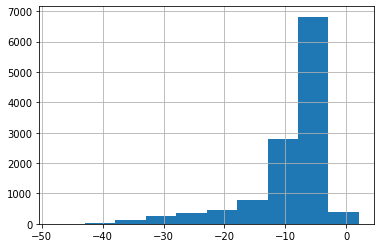

In [95]:
# Plotting histogram of 'loudness' column of dataset df
df['loudness'].hist()

Most loudness attribute values are between -14 to -2

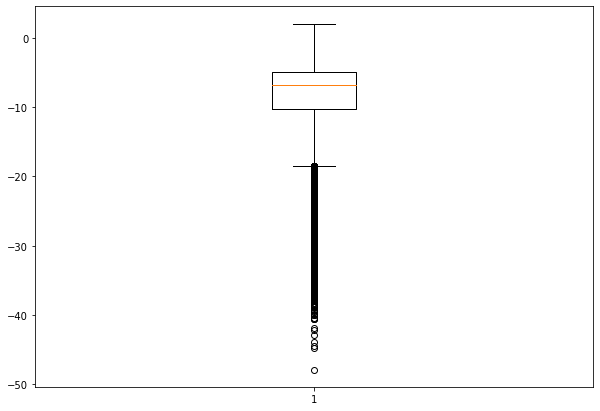

In [96]:
# Plotting the box plot of 'loudness' column of dataset df

import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['loudness'])
plt.show()

<AxesSubplot:>

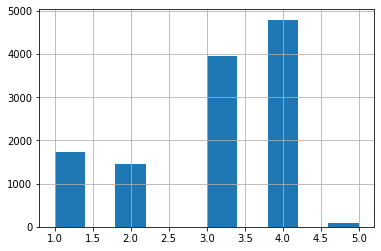

In [100]:
# From histogram, loudness is clustered between -14 to -2
# Creating loudness category attributes with 5 category

df["loudness_cat"] = pd.cut(df["loudness"],
bins=[-np.inf, -14, -10, -6, -2, np.inf],
labels=[1, 2, 3, 4, 5])
df["loudness_cat"].hist()

### Stratified train test splitting creation according to loudness_cat attribute

In [106]:
split_loudness_cat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index_l, test_index_l in split.split(df, df["loudness_cat"]):
    strat_train_set_loudness = df.loc[train_index_l]
    strat_test_set_loudness = df.loc[test_index_l]

### Statistical comparison for train test split

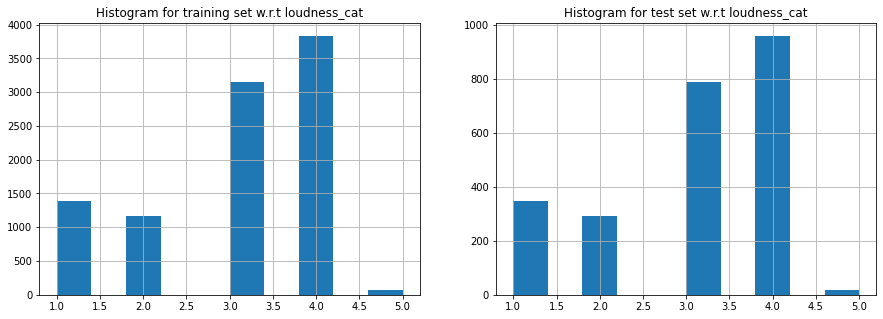

In [108]:
strat_plot(
    strat_train_set_loudness['loudness_cat'],
    strat_test_set_loudness['loudness_cat'],
    "Histogram for training set w.r.t loudness_cat",
    "Histogram for test set w.r.t loudness_cat"
)

In [113]:
strat_join(strat_train_set_loudness.describe()['energy'], 
         strat_test_set_loudness.describe()['energy'])

,Test set,Training set
count,9600.000000,2400.000000
mean,0.612204,0.611738
std,0.278370,0.277855
min,0.000707,0.001100
25%,0.434000,0.428000
50%,0.674000,0.672000
75%,0.843000,0.842000
max,0.999000,0.998000


### Exporting to CSV

In [115]:
# Dropping energy_cat since it is no longer required
strat_test_set_loudness.drop('loudness_cat', axis=1, inplace=True)
strat_train_set_loudness.drop('loudness_cat', axis=1, inplace=True)

# Exporting to csv files
strat_test_set_loudness.to_csv('data/loudness_test.csv', index=False)
strat_train_set_loudness.to_csv('data/loudness_train.csv', index=False)

## Stratified train-test splitting according to the feature 'acousticness'

<AxesSubplot:>

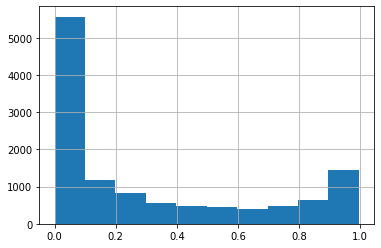

In [128]:
# Plotting histogram of 'acousticness' column of dataset df
df ['acousticness'].hist()

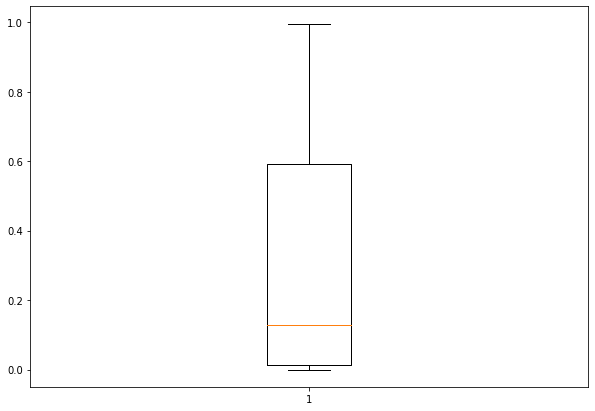

In [129]:
# Plotting the box plot of 'acousticness' column of dataset df
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['acousticness'])
plt.show()

<AxesSubplot:>

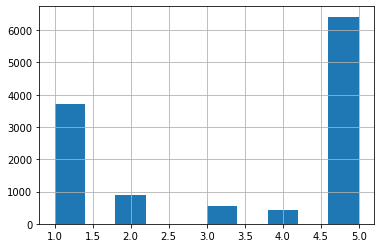

In [133]:
# From histogram, acousticess is clustered between 0 to 0.1
# Creating acousticness category attributes with 5 category

df["acousticness_cat"] = pd.cut(df["acousticness"],
bins=[0, 0.025, 0.05, 0.075, 0.1, np.inf],
labels=[1, 2, 3, 4, 5])
df['acousticness_cat'].hist()

### Stratified train test splitting creation according to acoustic_cat attribute

In [134]:
split_acoustic = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index_l, test_index_l in split.split(df, df["acousticness_cat"]):
    strat_train_set_acousticness = df.loc[train_index_l]
    strat_test_set_acousticness = df.loc[test_index_l]

### Checking acousticness category proportion in the test set

In [135]:
# Stratified acousticness category proportion in the test set calculation
strat_test_set_acousticness["acousticness_cat"].value_counts()/len(strat_test_set_acousticness)

5    0.534583
1    0.308750
2    0.075000
3    0.046667
4    0.035000
Name: acousticness_cat, dtype: float64

In [136]:
# Acousticness category proportion in the full data set calculation
df ['acousticness_cat'].value_counts()/len(df)

5    0.534583
1    0.308583
2    0.075083
3    0.046667
4    0.035083
Name: acousticness_cat, dtype: float64

## Stratified train-test splitting according to the feature 'instrumentalness'

<AxesSubplot:>

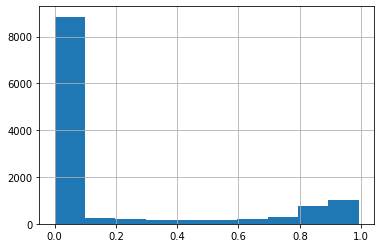

In [137]:
# Plotting histogram of 'energy' column of dataset df
df['instrumentalness'].hist()

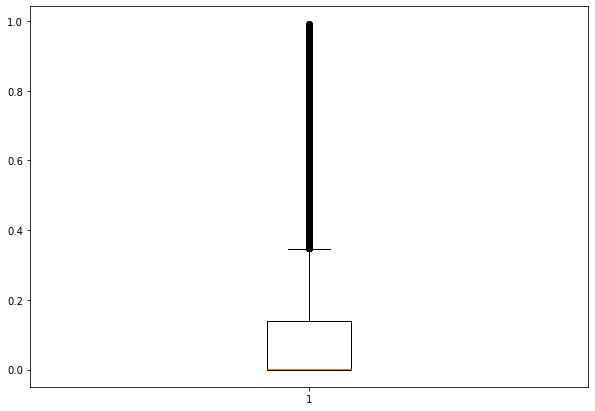

In [26]:
# Plotting the box plot of 'energy' column of dataset df
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['instrumentalness'])
plt.show()

<AxesSubplot:>

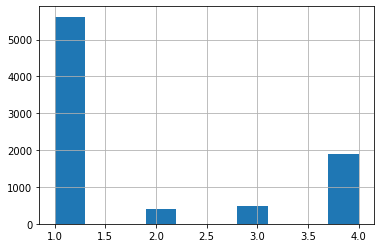

In [154]:
df["instrumentalness_cat"] = pd.cut(
    df["instrumentalness"],
    bins=[0, 0.25, 0.5, 0.75, 1, np.inf],
    labels=[1, 2, 3, 4, 5])
df["instrumentalness_cat"].hist()

In [156]:
sum(df["instrumentalness_cat"].value_counts())

8410

In [152]:
df["instrumentalness"].max()

0.993

In [142]:
split_instrumentalness = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index_l, test_index_l in split.split(df, df["instrumentalness_cat"]):
    strat_train_set_instrumentalness = df.loc[train_index_l]
    strat_test_set_instrumentalness = df.loc[test_index_l]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Comparing box plot of these 4 features (energy, loudness, acousticness, instrumentalness)

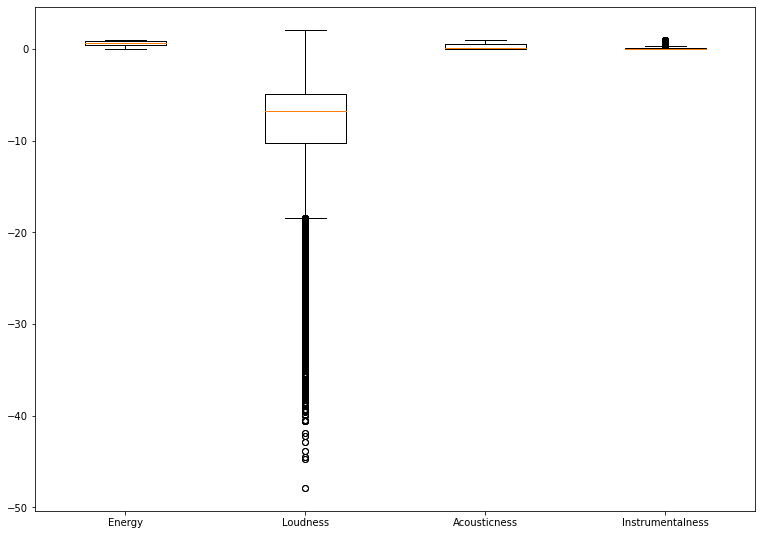

In [29]:
# Blox plot for four features
data = [df['energy'], df['loudness'], df['acousticness'], df['instrumentalness']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

# x-axis labels
ax.set_xticklabels(['Energy', 'Loudness',
                    'Acousticness', 'Instrumentalness'])
 
# show plot
plt.show()

### Train test splitting with purely random sampling method to see that stratified train test split has less error than random sampling:

In [30]:
#Train test splitting with purely random sampling method

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [31]:
# (Purely random sampling) Acousticness category proportion in the test set calculation

test_set['acousticness_cat'].value_counts()/len(test_set)

6    0.527083
1    0.291250
2    0.073542
3    0.045208
4    0.036458
5    0.026458
Name: acousticness_cat, dtype: float64

In [32]:
# Stratified acousticness category proportion in the test set calculation

strat_test_set_acousticness["acousticness_cat"].value_counts()/len(strat_test_set_acousticness)

6    0.534583
1    0.290000
2    0.069375
3    0.045417
4    0.034167
5    0.026458
Name: acousticness_cat, dtype: float64

In [33]:
# Acousticness category proportion in the full data set calculation
df ['acousticness_cat'].value_counts()/len(df)

6    0.534583
1    0.290083
2    0.069417
3    0.045417
4    0.034167
5    0.026333
Name: acousticness_cat, dtype: float64

## Label Encoding to Categorical Genre Column

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

## Creating stratified Train-Test split of the dataset using genre column

In [41]:
# Creating stratified train test split 
# dataset is divided in two parts, one with each attribute except genre, other one with only genre

X = df.drop('genre',axis=1)
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=43, 
    stratify=df['genre']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19200, 15), (4800, 15), (19200,), (4800,))

In [42]:
y_train.value_counts()

0    1920
1    1920
2    1920
3    1920
4    1920
5    1920
6    1920
7    1920
8    1920
9    1920
Name: genre, dtype: int64

In [43]:
y_test.value_counts()

0    480
4    480
8    480
1    480
5    480
9    480
2    480
6    480
3    480
7    480
Name: genre, dtype: int64

## Exporting Training set and Test set to CSV files

In [15]:
X_train.to_csv('data/X_train.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
X_test.to_csv ('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)